## Import 

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from model import load_features
from config import RESULTS_DIR

## Load data

In [2]:
df = load_features()
df.head()

,Close,High,Low,Open,Volume,log_return,volatility_20d,abs_return,return_squared,lag_1,lag_5,lag_10,lag_20,rolling_abs_return_mean_20d,target_volatility
Date,,,,,,,,,,,,,,,
1993-03-02,24.866394,24.866394,24.485962,24.520547,182400,0.014711,0.132772,0.014711,0.000216,-0.002819,-0.000715,-0.025551,0.007088,0.005358,0.109394
1993-03-03,24.970148,24.987440,24.866394,24.900979,280100,0.004164,0.133246,0.004164,0.000017,0.014711,0.012794,-0.000720,0.002116,0.005460,0.108620
1993-03-04,24.831806,25.004730,24.831806,25.004730,89500,-0.005556,0.129993,0.005556,0.000031,0.004164,0.002116,-0.000719,0.010516,0.005212,0.107370
1993-03-05,24.762632,24.970140,24.745340,24.866386,40000,-0.002790,0.129425,0.002790,0.000008,-0.005556,0.001409,0.003593,0.004176,0.005143,0.131427
1993-03-08,25.315989,25.315989,24.814511,24.814511,50800,0.022100,0.151810,0.022100,0.000488,-0.002790,-0.002819,0.003580,-0.000695,0.006213,0.103420


## Basic info

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8233 entries, 1993-03-02 to 2025-11-11
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Close                        8233 non-null   float64
 1   High                         8233 non-null   float64
 2   Low                          8233 non-null   float64
 3   Open                         8233 non-null   float64
 4   Volume                       8233 non-null   int64  
 5   log_return                   8233 non-null   float64
 6   volatility_20d               8233 non-null   float64
 7   abs_return                   8233 non-null   float64
 8   return_squared               8233 non-null   float64
 9   lag_1                        8233 non-null   float64
 10  lag_5                        8233 non-null   float64
 11  lag_10                       8233 non-null   float64
 12  lag_20                       8233 non-null   float64
 13  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,8233.0,1.636906e+02,1.463674e+02,24.132505,7.091512e+01,9.537011e+01,2.168121e+02,6.873900e+02
High,8233.0,1.646117e+02,1.470628e+02,24.393114,7.153467e+01,9.604051e+01,2.171538e+02,6.897000e+02
Low,8233.0,1.626411e+02,1.455249e+02,24.063009,7.024163e+01,9.461147e+01,2.159708e+02,6.848300e+02
Open,8233.0,1.636733e+02,1.463317e+02,24.097756,7.095920e+01,9.547301e+01,2.168647e+02,6.887200e+02
Volume,8233.0,8.350862e+07,9.003583e+07,5200.000000,1.217790e+07,6.313310e+07,1.114553e+08,8.710263e+08
log_return,8233.0,4.041891e-04,1.176660e-02,-0.115887,-4.347275e-03,6.817266e-04,5.932027e-03,1.355773e-01
volatility_20d,8233.0,1.588940e-01,1.005857e-01,0.031859,9.587710e-02,1.344199e-01,1.927211e-01,9.397140e-01
abs_return,8233.0,7.831369e-03,8.790819e-03,0.000000,2.226173e-03,5.333337e-03,1.040494e-02,1.355773e-01
return_squared,8233.0,1.385994e-04,5.057259e-04,0.000000,4.955846e-06,2.844448e-05,1.082627e-04,1.838121e-02
lag_1,8233.0,4.035690e-04,1.176664e-02,-0.115887,-4.347275e-03,6.804867e-04,5.932027e-03,1.355773e-01


## Visualizing Returns

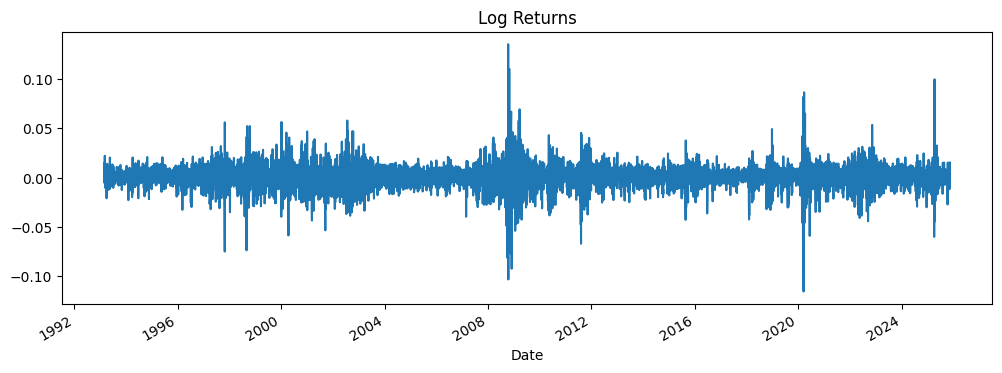

In [5]:
df["log_return"].plot(figsize=(12,4), title="Log Returns")
plt.savefig(f"{RESULTS_DIR}/figures/eda/log_returns.png")

## Volatility clustering

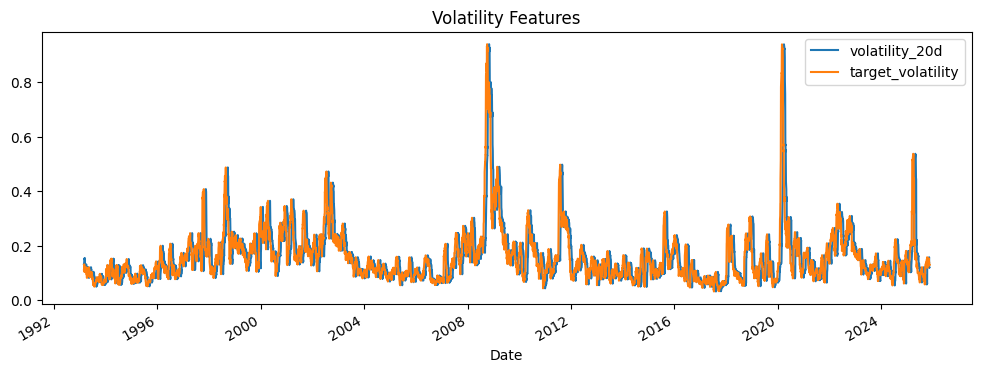

In [6]:
vol_cols = [c for c in df.columns if "volatility" in c]

df[vol_cols].plot(figsize=(12,4))
plt.title("Volatility Features")
plt.savefig(f"{RESULTS_DIR}/figures/eda/volatility_features.png")


## Target inspection

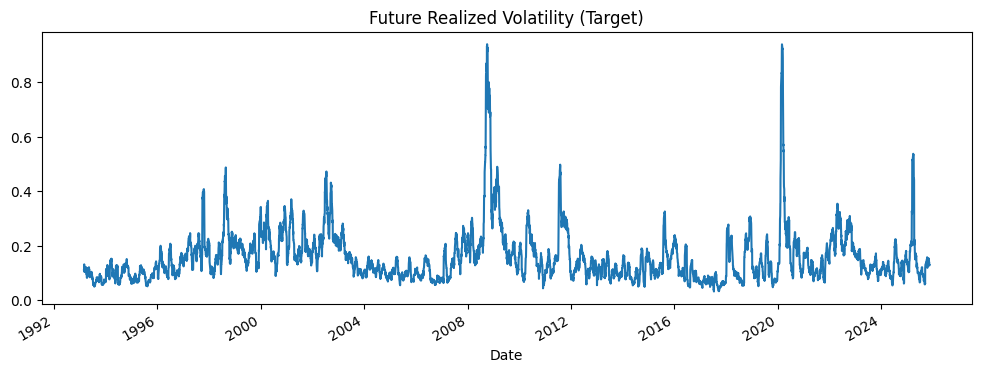

In [7]:
df["target_volatility"].plot(figsize=(12,4),
                             title="Future Realized Volatility (Target)")
plt.savefig(f"{RESULTS_DIR}/figures/eda/target_volatility.png")

## Correlation (features vs target)

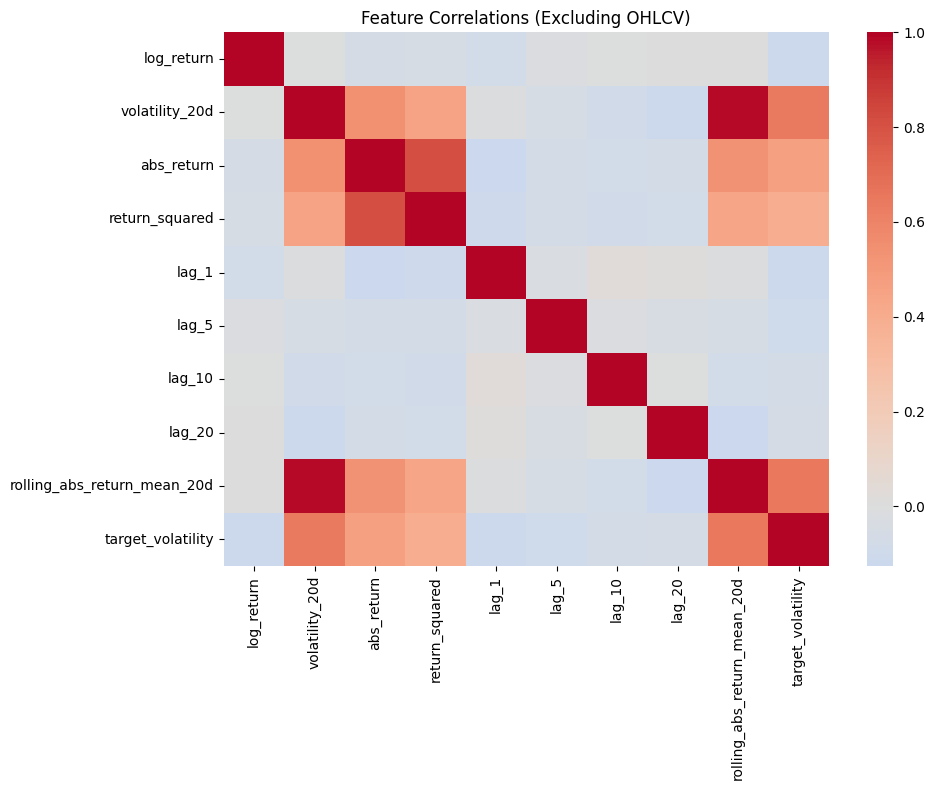

In [10]:
# Exclude OHLCV for cleaner correlation heatmap
exclude_price_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=exclude_price_cols, errors='ignore')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlations (Excluding OHLCV)")
plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/figures/eda/correlations.png", dpi=300, bbox_inches="tight")